# EDA Obesity prediction
##### Larissa Voshol | Klas bfv2 | 05/03/2024

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
! head data/ObesityDataSet.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


Data openen en even met de oogjes naar kijken. Daarna ook even met wat machinale oogjes naar kijken die er mooi grafieken van maken voor onze oogjes.

In [111]:
df_obesity = pd.read_csv('data/ObesityDataSet.csv')
df_obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


__Codebook__

Bij deze dataset is de bijbehorende codebook

In [5]:
codebook = {
    "attribute": df_obesity.columns.tolist(),
    "unit": ["n.a.", "jaar", "meter", "kilogram", "n.a.", "n.a.", "frequentie", "frequentie", "n.a.", "n.a", "frequentie", "n.a.", "frequentie", "frequentie", "n.a", "n.a", "n.a."],
    "dtype": ["string", "Uint8", "float32", "Uint8", "boolean", "boolean", "Uint8", "Unit8", "string", "boolean", "Uint8", "boolean", "Uint8", "Uint8", "string", "string", "string"],
    "description": ["Geslacht",
                    "Leeftijd",
                    "Lengte",
                    "Gewicht",
                    "Heeft/had een familie last van overwicht",
                    "Vaak consumeren van calorierijke voedsel",
                    "frequentie consumeren van groentes",
                    "Aantal grootte maaltijden",
                    "Consumptie van snacks tussen maaltijden",
                    "Consumptie van water",
                    "Worden calorieën geteld"
                    "Frequentie actieve beweging",
                    "TUE"
                    "Consumptie van Alchol",
                    "Verplaatsingsmethode",
                    "Obesity waarde"]
}

In [6]:
df_obesity.shape

(2111, 17)

In [39]:
types = df_obesity.dtypes.reset_index()
types = pd.concat([types, pd.DataFrame(codebook["dtype"])], ignore_index=True, axis=1, names=["object", "werkelijkheid", "Theoretisch"])
types.set_index(0, inplace=True)

types

,1,2
0,,
Gender,object,string
Age,float64,Uint8
Height,float64,float32
Weight,float64,Uint8
family_history_with_overweight,int64,boolean
FAVC,int64,boolean
FCVC,float64,Uint8
NCP,float64,Unit8
CAEC,int64,string


Ik krijg het niet helemaal visueel maar de eerste kolom wat dus de werkelijke eenheden zijn en de tweede welke ik dus theoretisch aan het ding heb gegeven. Maar dit is opzich overeenkomend.

In [8]:
int_value = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
str_value = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "NObeyesdad"]

In [9]:
df_obesity[df_obesity.select_dtypes(['object']).columns] = df_obesity.select_dtypes(['object']).astype(str)

df_obesity.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

#### Data bekijken

## univariaat

In [110]:
df_obesity.describe()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,PCA
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.0,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.0,2111.0,2111.0,2.111000e+03
mean,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,0.0,0.020843,2.008011,0.045476,1.010298,0.657866,0.0,0.0,0.0,-1.206341e-14
std,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.0,0.142893,0.612953,0.208395,0.850592,0.608927,0.0,0.0,0.0,2.622624e+01
min,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,-4.775229e+01
25%,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,0.0,0.000000,1.584812,0.000000,0.124505,0.000000,0.0,0.0,0.0,-2.106918e+01
50%,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,0.0,0.000000,2.000000,0.000000,1.000000,0.625350,0.0,0.0,0.0,-3.641632e+00
75%,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,0.0,0.000000,2.477420,0.000000,1.666678,1.000000,0.0,0.0,0.0,2.093180e+01
max,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,0.0,1.000000,3.000000,1.000000,3.000000,2.000000,0.0,0.0,0.0,8.596732e+01


Zie hier de beschrijvende statstiek, krijg je een idee van de waarde.

Niet ingevulde data aanwezig?

In [40]:
isna = pd.DataFrame({"isna" : df_obesity.isna().sum(),
                    "isnull" : df_obesity.isnull().sum()})
isna

,isna,isnull
Gender,0,0
Age,0,0
Height,0,0
Weight,0,0
family_history_with_overweight,0,0
FAVC,0,0
FCVC,0,0
NCP,0,0
CAEC,0,0
SMOKE,0,0


Verdeling van data

Welke waarden zijn bij elke kolom mogelijk

In [112]:
result_df = pd.DataFrame()

for col in df_obesity:
    unique_values = pd.Series(df_obesity[col].unique(), name=col)
    result_df = pd.concat([result_df, unique_values], axis=1)

result_df.head(10)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Male,23.0,1.52,56.0,no,yes,3.000000,1.000000,Frequently,yes,3.000000,yes,3.000000,0.000000,Sometimes,Walking,Overweight_Level_I
2,NaN,27.0,1.80,77.0,NaN,NaN,1.000000,4.000000,Always,NaN,1.000000,NaN,2.000000,2.000000,Frequently,Automobile,Overweight_Level_II
3,NaN,22.0,1.78,87.0,NaN,NaN,2.450218,3.289260,no,NaN,1.152736,NaN,1.000000,0.294990,Always,Motorbike,Obesity_Type_I
4,NaN,29.0,1.50,89.8,NaN,NaN,2.880161,3.995147,NaN,NaN,1.115967,NaN,0.319156,0.838957,NaN,Bike,Insufficient_Weight
5,NaN,24.0,1.64,53.0,NaN,NaN,2.008760,1.726260,NaN,NaN,2.704507,NaN,1.541072,0.479221,NaN,NaN,Obesity_Type_II
6,NaN,26.0,1.72,55.0,NaN,NaN,2.596579,2.581015,NaN,NaN,2.184707,NaN,1.978631,0.625350,NaN,NaN,Obesity_Type_III
7,NaN,41.0,1.85,68.0,NaN,NaN,2.591439,1.600812,NaN,NaN,2.406541,NaN,0.100320,0.265790,NaN,NaN,NaN
8,NaN,30.0,1.65,105.0,NaN,NaN,2.392665,1.737620,NaN,NaN,2.984323,NaN,1.586525,0.555468,NaN,NaN,NaN
9,NaN,52.0,1.77,80.0,NaN,NaN,1.123939,1.105480,NaN,NaN,2.444125,NaN,1.399183,0.928972,NaN,NaN,NaN


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'family_history_with_overweight'}>],
       [<Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CAEC'}>],
       [<Axes: title={'center': 'SMOKE'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>, <Axes: title={'center': 'FAF'}>],
       [<Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>,
        <Axes: title={'center': 'NObeyesdad'}>]], dtype=object)

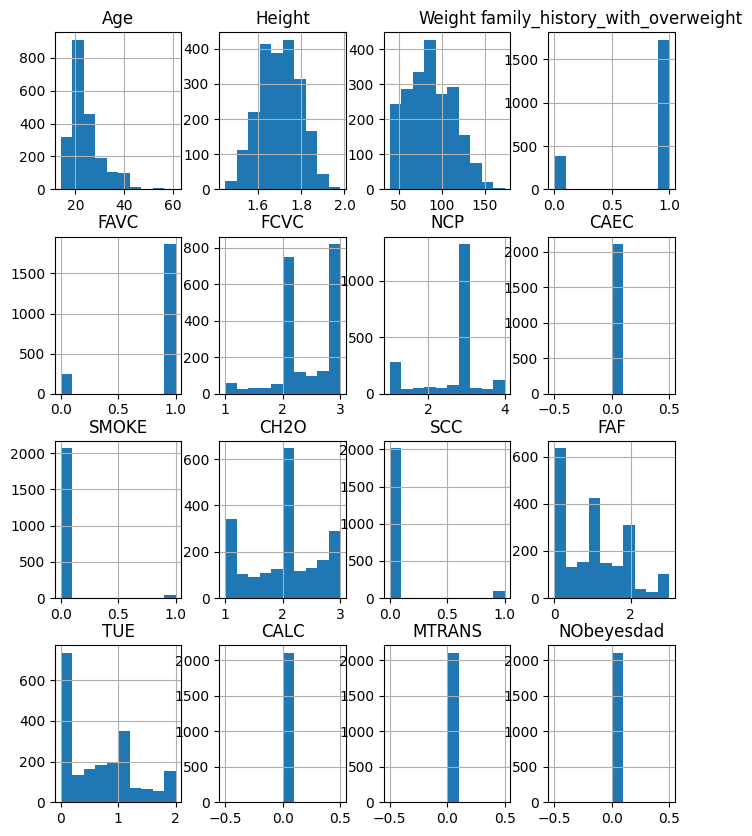

In [42]:
df_obesity.hist(figsize=(8,10))

wooww prachtig. Er zijn wel een paar niet normaalverdeelde kollomen aanwezig. Doormiddel van log en wortel even kijken of dit te verbeteren is.

ff kijken of een wortel verdeling mooier kan zijn.

In [14]:
for col in int_value:
    new_attribute = "sqrt(" + col + ")"
    df_obesity[new_attribute] = np.sqrt(df_obesity[col])

array([[<Axes: title={'center': 'sqrt(Age)'}>,
        <Axes: title={'center': 'sqrt(Height)'}>,
        <Axes: title={'center': 'sqrt(Weight)'}>],
       [<Axes: title={'center': 'sqrt(FCVC)'}>,
        <Axes: title={'center': 'sqrt(NCP)'}>,
        <Axes: title={'center': 'sqrt(CH2O)'}>],
       [<Axes: title={'center': 'sqrt(FAF)'}>,
        <Axes: title={'center': 'sqrt(TUE)'}>, <Axes: >]], dtype=object)

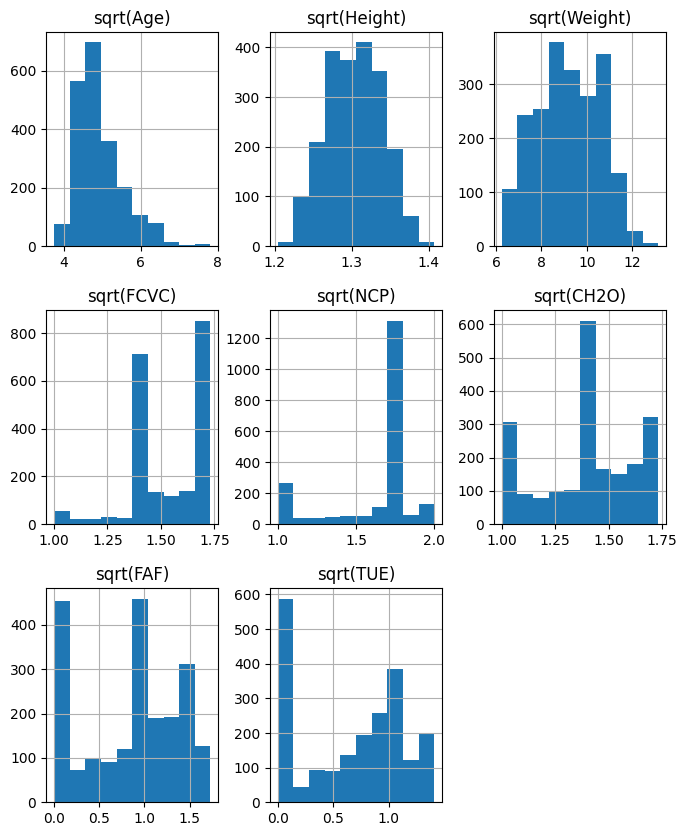

In [15]:
df_obesity.iloc[:,17:25].hist(figsize=(8,10))

Of mischien een log verdeling.

In [16]:
for col in int_value:
    new_attribute = "log(" + col + ")"
    df_obesity[new_attribute] = np.log(df_obesity[col])

c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([[<Axes: title={'center': 'log(Age)'}>,
        <Axes: title={'center': 'log(Height)'}>],
       [<Axes: title={'center': 'log(Weight)'}>,
        <Axes: title={'center': 'log(FCVC)'}>],
       [<Axes: title={'center': 'log(NCP)'}>,
        <Axes: title={'center': 'log(CH2O)'}>]], dtype=object)

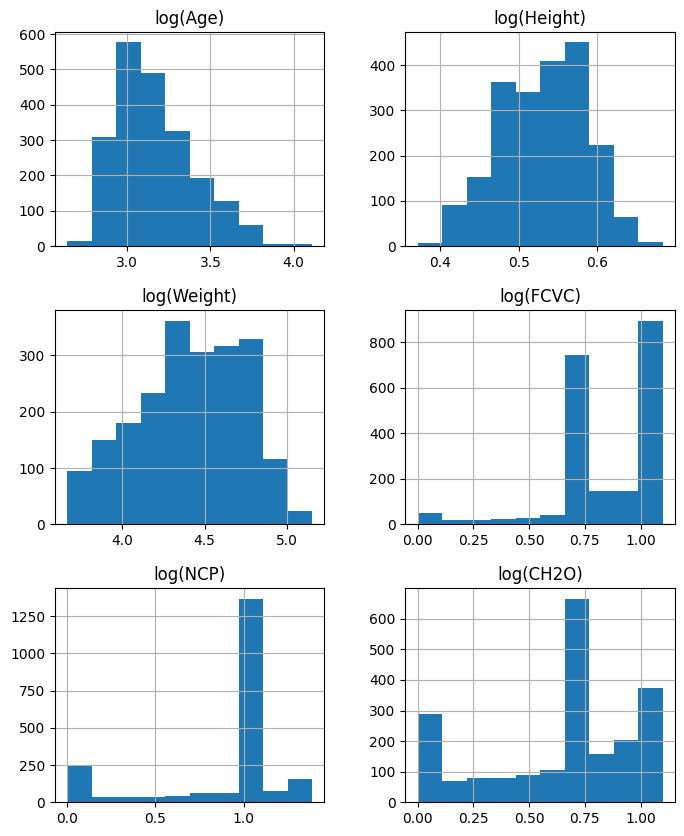

In [17]:
df_obesity.iloc[:,25:31].hist(figsize=(8,10))

moet zeggen transformatie zijn bagger slecht denk dat ik het gewoon moet doen met de normale. Ik verwijder ze maar weer.

In [18]:
df_obesity = df_obesity.iloc[:,:17]

Dit zijn de kolom waarden die bezitten over niet numierke eenheden. Daar maak ik apparte staafdiagram en boxplot van.

In [19]:
str_value

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

<Axes: xlabel='SCC', ylabel='Count'>

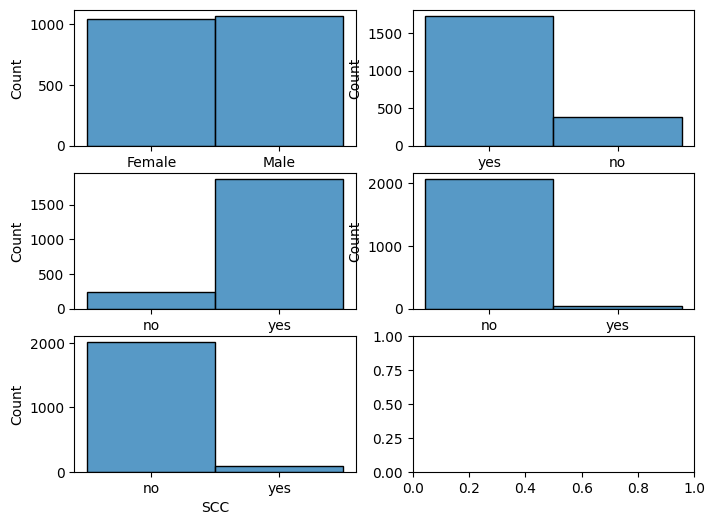

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

sns.histplot(df_obesity, x=str_value[0], ax=axes[0,0])
sns.histplot(df_obesity, x=str_value[1], ax=axes[0,1])
sns.histplot(df_obesity, x=str_value[2], ax=axes[1,0])
sns.histplot(df_obesity, x=str_value[4], ax=axes[1,1])
sns.histplot(df_obesity, x=str_value[5], ax=axes[2,0])

Mannen en vrouwen komen ongeveer evenvaak voor. Dit zorgt ervoor dat er geen overtuigende beredenering zal ontstaan.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Normal_Weight'),
  Text(1, 0, 'Overweight_Level_I'),
  Text(2, 0, 'Overweight_Level_II'),
  Text(3, 0, 'Obesity_Type_I'),
  Text(4, 0, 'Insufficient_Weight'),
  Text(5, 0, 'Obesity_Type_II'),
  Text(6, 0, 'Obesity_Type_III')])

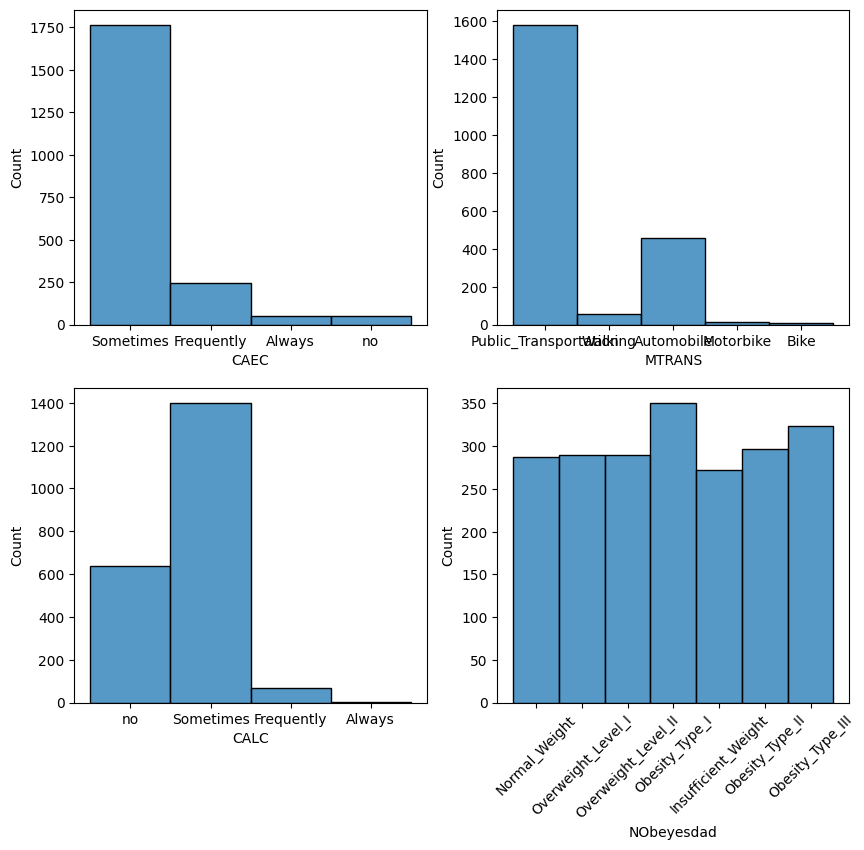

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 9))

sns.histplot(df_obesity, x=str_value[3], ax=ax[0,0])
sns.histplot(df_obesity, x=str_value[6], ax=ax[1,0])
sns.histplot(df_obesity, x=str_value[7], ax=ax[0,1])
sns.histplot(df_obesity, x=str_value[8], ax=ax[1,1])
plt.xticks(rotation=45)


Vele data is gebaseerd op een schaal, hierin hoef ik dus niet te kijken naar verdeling. Voor gewicht, leeftijd en lengte is dat nog wel handig om te doen. of er uitschieters aanwezig zijn. De NOBeyesdad is de clafficatie waar naar gekeken wordt. En dat is best aardig gelijk verdeeld.

<Axes: >

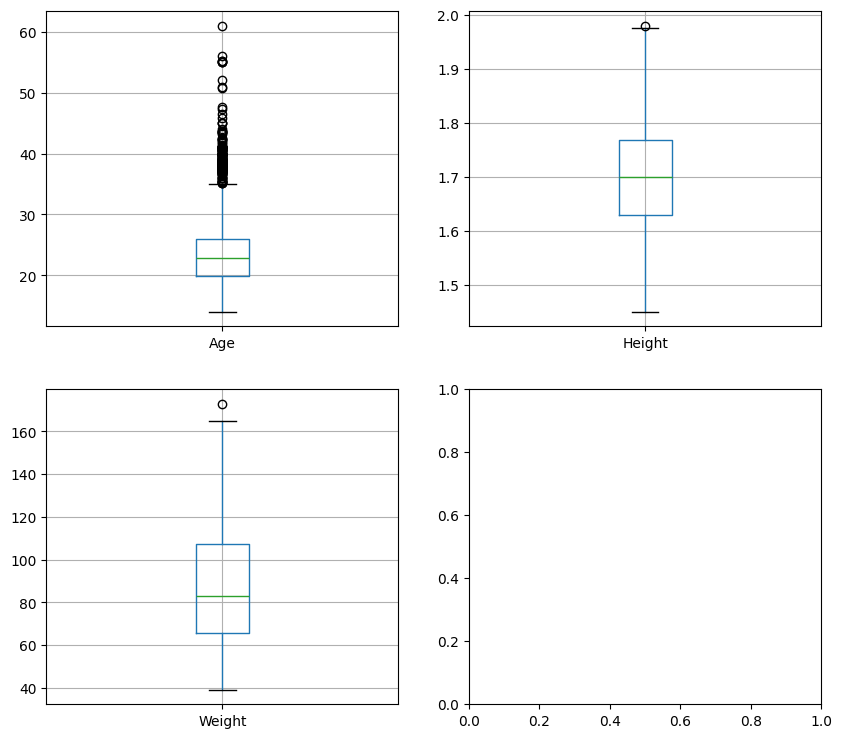

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 9))
df_obesity.iloc[:, :2].boxplot(ax=axes[0,0])
df_obesity.iloc[:, 2:3].boxplot(ax=axes[0,1])
df_obesity.iloc[:, 3:4].boxplot(ax=axes[1,0])


## Bivariaat

Verander de niet numeriek waardes even naar getallen dus:

In [23]:
changes = {"frequency": ["No", "Sometimes", "Always", "Frequently"],
           "transportation": ["Public_Transportation", "Walking", "Automobile", "Motorbike", "Bike"],
           "obesity type" : ["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"]
}

In [135]:
df_obesity.replace([True,"yes"], 1, inplace=True)
df_obesity.replace([False, "no"], 0, inplace=True)
for change in changes:
    replace_with = 0
    for replace in changes[change]:
        replace_with +=1
        df_obesity.replace(replace, replace_with, inplace=True)


Prachtige heatmap voor correlatie tussen de kollomen.

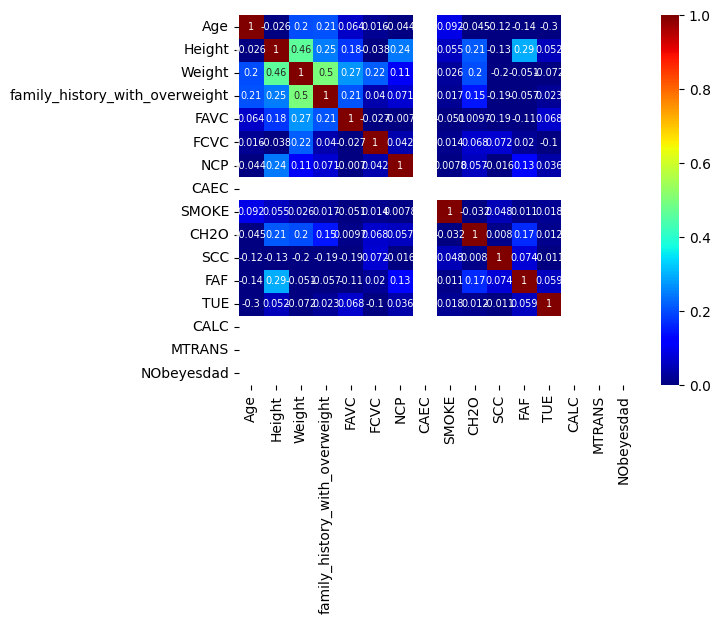

In [25]:
axs = sns.heatmap(df_obesity.iloc[:, 1:].corr(), annot=True, annot_kws={"fontsize": "x-small"}, cmap="jet", vmin=0.0, vmax=1.0)

Niet echt hele extreme uitschieters wat jammer is mischien iets met een PCA.

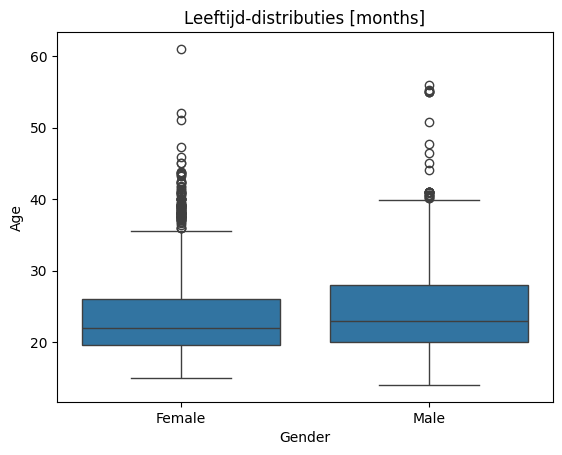

In [43]:
axs = sns.boxplot(data=df_obesity, x="Gender", y="Age")
axs.set_title("Leeftijd-distributies [months]");

Als de man en vrouw verdeling per classificatie een beetje gelijk is.

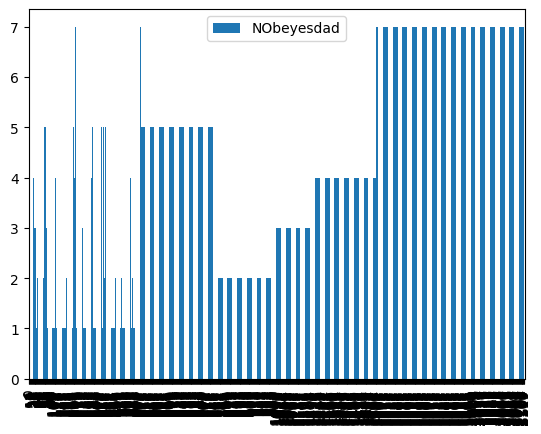

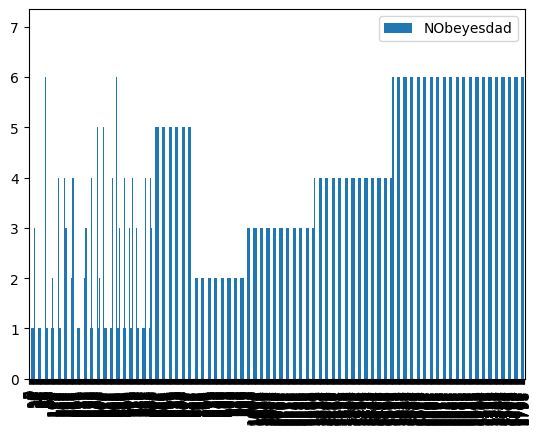

In [136]:
ax = df_obesity[["NObeyesdad", "Gender"]].groupby("Gender").plot.bar(stacked=True)


ehhh wijzelijke deze negeren heeft nog wat liefde nodig:)

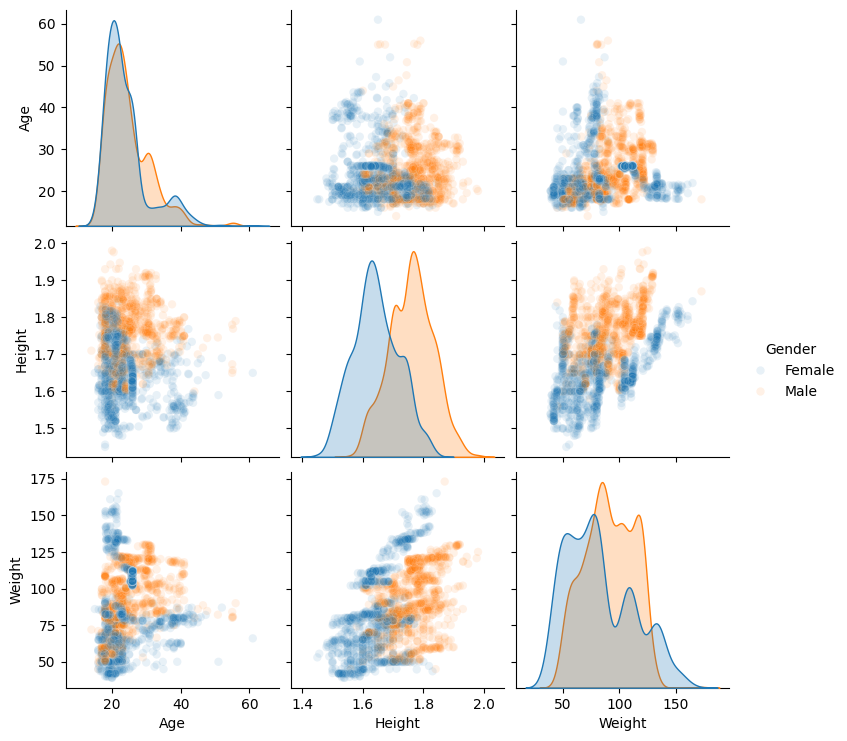

In [46]:
sns.pairplot(df_obesity.iloc[:, 0:4], hue="Gender", plot_kws={'alpha': 0.1});

ik maak ook nog een combo van de overige waardes waar met een numerieke waarde is beantwoord

In [138]:
int_value

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

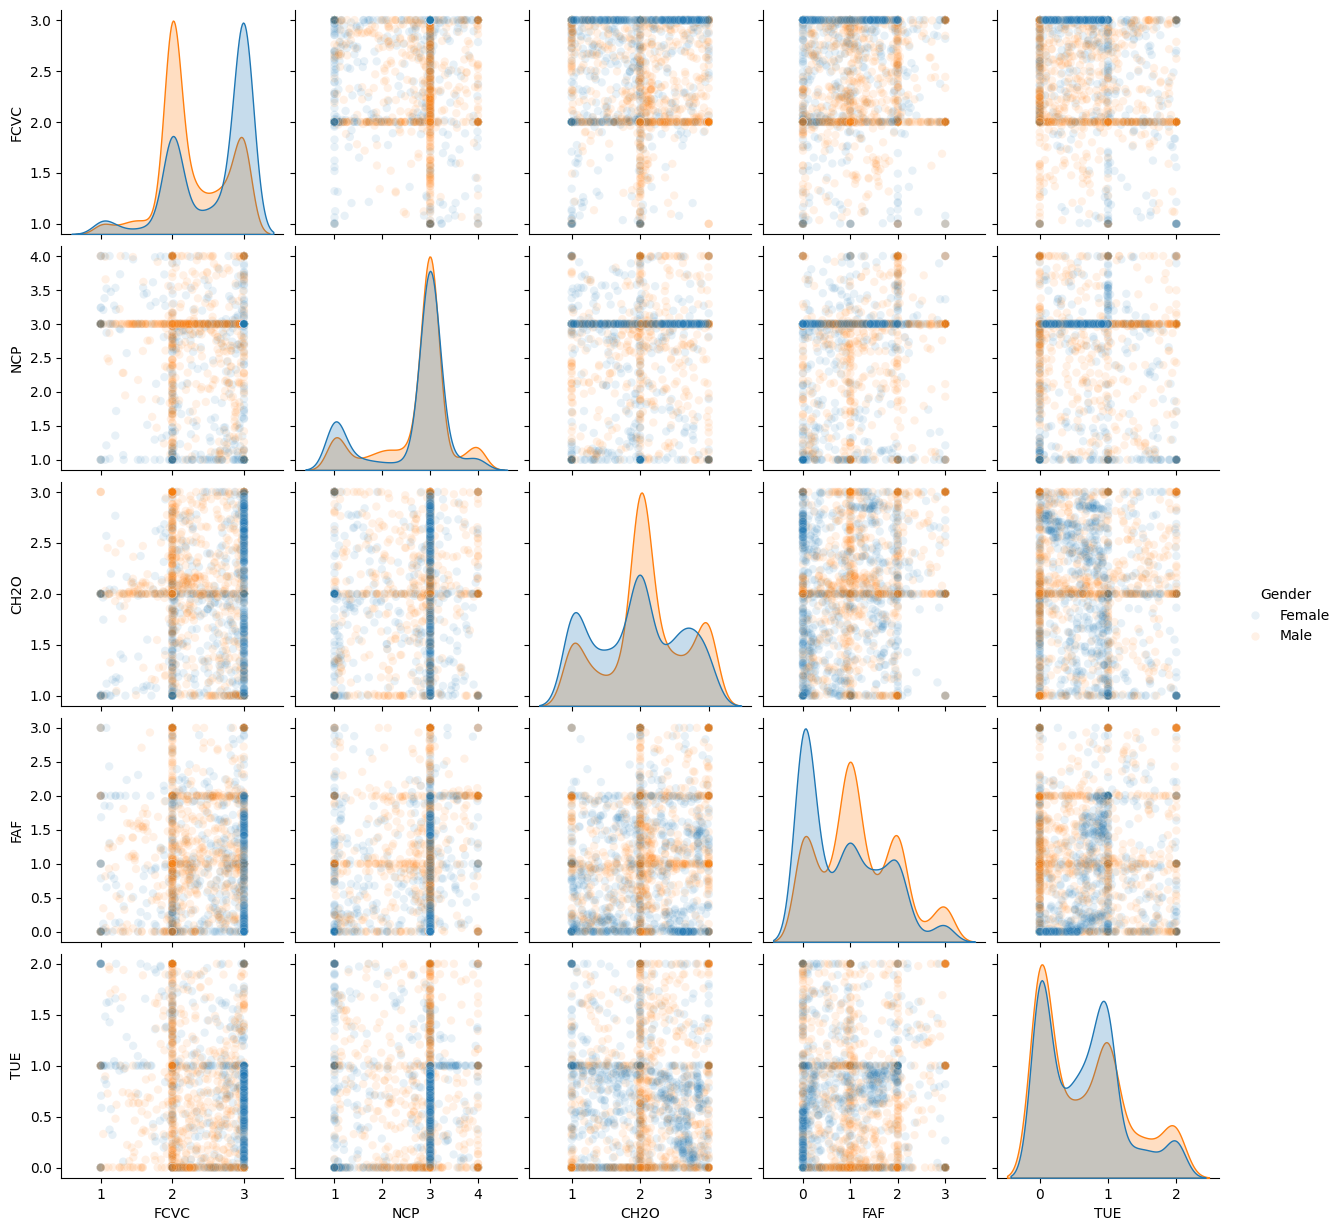

In [137]:
int_value.append("Gender")
sns.pairplot(df_obesity[int_value[3:]], hue="Gender", plot_kws={'alpha': 0.1})
int_value.remove("Gender")

ehhh ja niet helemaal

## multivaraat

meui PCA

In [98]:
from sklearn.decomposition import PCA

numeric = df_obesity[int_value]
pca = PCA().fit(numeric)
components = pca.transform(numeric)

df_obesity["PCA"] = components[:, 0]
pd.DataFrame(df_obesity["PCA"].describe())

,PCA
count,2.111000e+03
mean,-1.206341e-14
std,2.622536e+01
min,-4.775569e+01
25%,-2.106434e+01
50%,-3.643545e+00
75%,2.093070e+01
max,8.596846e+01


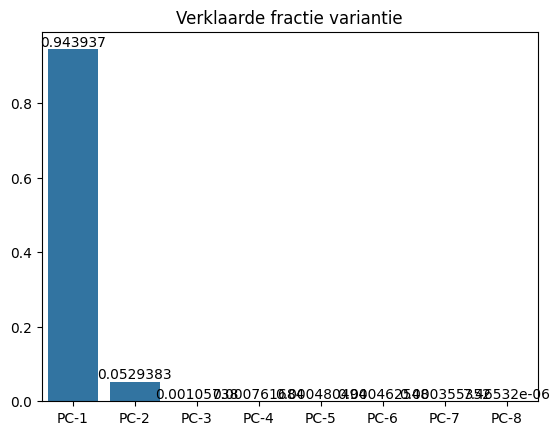

In [99]:
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(8)], y=pca.explained_variance_ratio_)
axs.bar_label(axs.containers[0])
axs.set_title("Verklaarde fractie variantie");

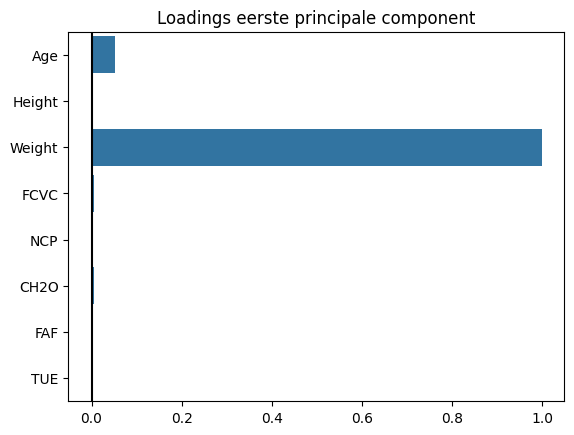

In [100]:
axs = sns.barplot(y=int_value, x=pca.components_[0, :])
axs.axvline(0.0, color="k")
axs.set_title("Loadings eerste principale component");

Suprise gewicht is de hoogste, ahh okay mischien dat er een verschil zit bij de waardes waar is geantwoord met een niet numeriek antwoord.

In [105]:
from sklearn.decomposition import PCA

numeric = df_obesity.iloc[:,1:17]
pca = PCA().fit(numeric)
components = pca.transform(numeric)

df_obesity["PCA"] = components[:, 0]
pd.DataFrame(df_obesity["PCA"].describe())

,PCA
count,2.111000e+03
mean,-1.206341e-14
std,2.622624e+01
min,-4.775229e+01
25%,-2.106918e+01
50%,-3.641632e+00
75%,2.093180e+01
max,8.596732e+01


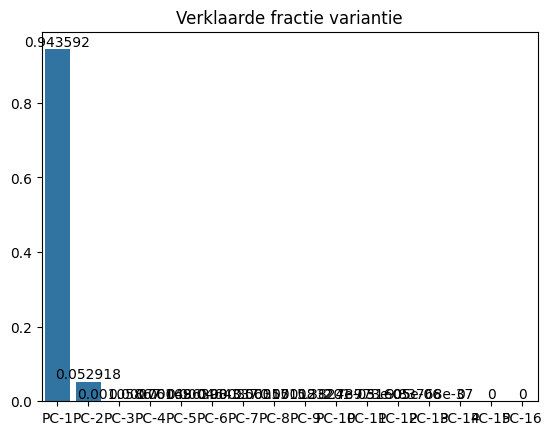

In [107]:
axs = sns.barplot(x=[f"PC-{n+1}" for n in range(16)], y=pca.explained_variance_ratio_)
axs.bar_label(axs.containers[0])
axs.set_title("Verklaarde fractie variantie");

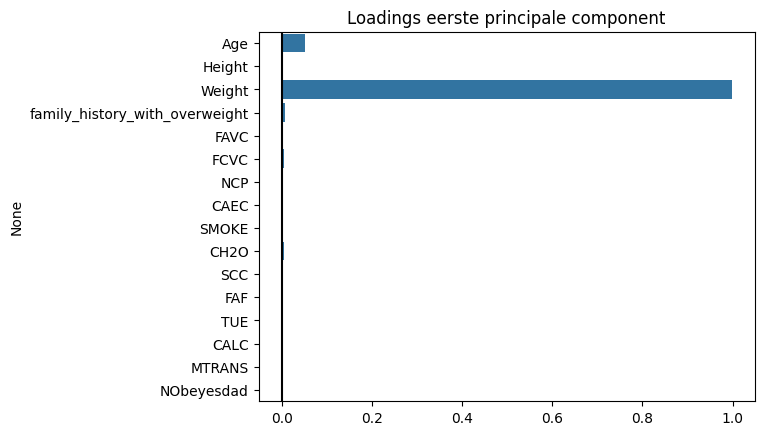

In [108]:
axs = sns.barplot(y=numeric.columns ,x=pca.components_[0, :])
axs.axvline(0.0, color="k")
axs.set_title("Loadings eerste principale component");

Niet heel veel anders.